In [3]:
#install library for machine learning
pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 131.3 kB/s eta 0:01:24
   ---------------------------------------- 0.0/10.9 MB 131.3 kB/s eta 0:01:24
   ---------------------------------------- 0.0/10.9 MB 131.3 kB/s eta 0:01:24
   ---------------------------------------- 0.0/10.9 MB 108.9 kB/s eta 0:01:41
   ---------------------------------------- 0.0/10.9 MB 108.9 kB/s eta 0:01:41
   ---------------------------------------- 0.0/10.9 MB 109.3 kB/s eta 0:01:40
   ---------------------------------------- 0.0/10.9 MB 109.3 kB/s eta 0:01:40
   ------------------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
#install library for machine learning
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 409.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 409.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 610.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 610.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 610.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 468.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 468.3 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 486.5 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 486.5 kB/s eta 0:00:03
   -------- ------------------------------- 0.3/1.4 MB 559.2 kB/s eta 0:00:03
   -------- -


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#install libraries for preprocessing and ML
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('Updated_Sales_Dataset.csv')

In [ ]:
# CUSTOMER SEGMENTATION USING CLUSTERING (KMEANS ALGORITHM)

In [13]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# SELECT COLUMNS FOR CLUSTERING
numeric_columns = ['Customer Age', 'Quantity', 'Sales', 'Profit']
features = data[numeric_columns].dropna()

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

#Adding cluster labels to the data
data['Cluster'] = pd.Series(clusters, index=features.index)

data.head()


,Transaction ID,Customer ID,Product ID,Transaction Date,Purchase Hour,Quantity,Price,Discounts,Payment Method,Product Category,...,Shipping Cost,Promotion Used,Customer Log Type,Product Description,Profit,Priority Order,Sales,Weekend or Weekday,Month,Cluster
0,7965,1091,103,2023-01-01,12,4,349.59,0.20,E-wallet,Fashion,...,10.24,Yes,Guest,Watch,132.253148,Medium,1173.494904,Weekend,1,1
1,8617,1034,126,2023-01-01,15,2,264.19,0.08,Credit Card,Electronics,...,16.95,Yes,Member,Camera,161.452391,Low,571.864043,Weekend,1,2
2,8777,1001,115,2023-01-01,19,3,468.64,0.20,E-wallet,Electronics,...,19.31,No,Member,Smartphone,349.041252,Medium,1319.092580,Weekend,1,1
3,1716,1014,125,2023-01-01,12,8,231.71,0.01,Cash,Electronics,...,6.60,Yes,Member,Camera,548.295176,Low,2802.872258,Weekend,1,3
4,3164,1010,103,2023-01-01,1,7,17.26,0.16,E-wallet,Home & Garden,...,13.83,Yes,Member,Chair,22.624874,High,144.227514,Weekend,1,2


In [14]:
# Calculate cluster profiles by aggregating numeric columns
cluster_profiles = data.groupby('Cluster')[numeric_columns].mean()

# Display the cluster profiles
cluster_profiles


,Customer Age,Quantity,Sales,Profit
Cluster,,,,
0,34.756950,6.777998,1311.259568,249.043047
1,32.318702,2.523664,440.688567,85.948610
2,58.630824,4.178234,678.784242,130.001532
3,46.310653,7.606804,2861.137728,604.552394


In [ ]:
# MARKET BASKET ANALYSIS USING APRIORI ALGORITHM

# Market Basket Analysis is a data mining technique used to identify associations or relationships between items in a dataset.
# It helps to find frequent itemsets or groups of items that appear together in transactions. This technique is commonly used
# in retail to understand customer purchasing behavior, optimize inventory, and develop cross-selling strategies.

# Example:
# Suppose we have a dataset of transactions at a grocery store, where each transaction is a list of items purchased together.
# For instance:
# Transaction 1: {Milk, Bread, Eggs}
# Transaction 2: {Bread, Butter}
# Transaction 3: {Milk, Bread, Butter, Eggs}
# Transaction 4: {Bread, Butter}
# Transaction 5: {Milk, Bread, Butter, Eggs}

# Apriori Algorithm:
# The Apriori algorithm is a popular method used for Market Basket Analysis. It works by identifying frequent individual items
# in the dataset and extending them to larger itemsets as long as those itemsets appear sufficiently often in the transactions.
# The algorithm operates on the principle that if an itemset is frequent, then all of its subsets must also be frequent.

C:\Users\User\AppData\Local\Temp\ipykernel_4228\1078678297.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_data = basket_data.applymap(lambda x: x > 0)  # Convert to boolean
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


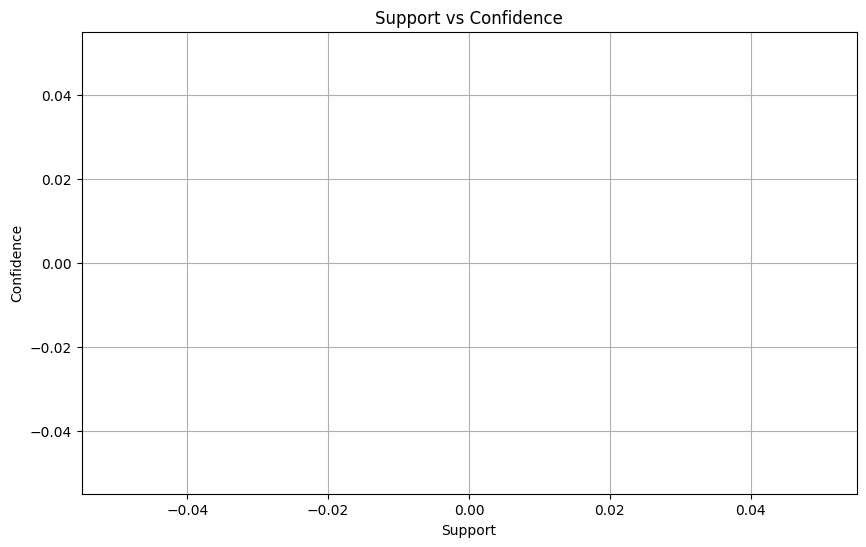

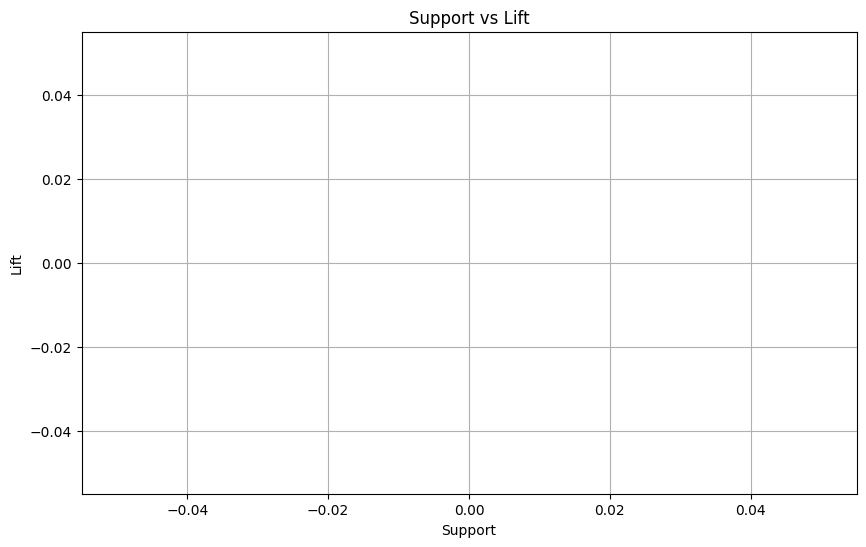

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Ensure the 'Transaction Date' column is in datetime format
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Preparing the data for Market Basket Analysis
basket_data = data.groupby(['Transaction ID', 'Product Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction ID')
basket_data = basket_data.applymap(lambda x: x > 0)  # Convert to boolean

# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top 10 association rules sorted by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_rules)

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

# Scatter plot of support vs lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

# Filter rules with a minimum confidence and lift
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]

# Display the filtered rules
filtered_rules.sort_values(by='lift', ascending=False).head(10)


In [ ]:
#The Output here is empty as out dataset does not have trasncations with multiple different products at once

In [ ]:
# REGULAR CUSTOMERS SEGMENTATION, BASKET ANALYSIS, LOYALTY, TARGETED PLANS

In [28]:
recurring_customers = data['Customer ID'].value_counts()
recurring_customers = recurring_customers[recurring_customers > 1]
recurring_customers

Customer ID
1024    126
1030    121
1056    120
1015    119
1020    117
       ... 
1046     81
1049     79
1085     78
1077     78
1033     69
Name: count, Length: 100, dtype: int64